#### TF-IDF: Exercises
- Humans 👦 show different emotions/feelings based on the situations and communicate them through facial expressions or in form of words.

- In Social Media like Twitter and Instagram, many people express their views through comments about a particular event/scenario and these comments may address the feelings like sadness, happiness, joy, sarcasm, fear, and many other.

- For a given comment/text, we are going to use classical NLP techniques and classify under which emotion that particular comment belongs!

- We are going to use techniques like Bag of grams, n-grams, TF-IDF, etc. for text representation and apply different classification algorithms.

#### About Data: Emotion Detection
- Credits: https://www.kaggle.com/datasets/abdallahwagih/emotion-dataset

- This data consists of two columns. - Comment - Emotion

- Comment are the statements or messages regarding to a particular event/situation.

- Emotion feature tells whether the given comment is fear 😨, Anger 😡, Joy 😂.

- As there are only 3 classes, this problem comes under the Multi-Class Classification.

In [182]:
import pandas as pd

In [183]:
df = pd.read_csv('dataset/Emotion_classify_Data.csv')

In [184]:
df.shape

(5937, 2)

In [185]:
df.head()

,Comment,Emotion
0,i seriously hate one subject to death but now ...,fear
1,im so full of life i feel appalled,anger
2,i sit here to write i start to dig out my feel...,fear
3,ive been really angry with r and i feel like a...,joy
4,i feel suspicious if there is no one outside l...,fear


In [186]:
df.Emotion.value_counts()

Emotion
anger    2000
joy      2000
fear     1937
Name: count, dtype: int64

In [187]:
df['Emotion_num'] = df.Emotion.map({
    'joy': 0,
    'fear': 1,
    'anger': 2
})

In [188]:
df.head()

,Comment,Emotion,Emotion_num
0,i seriously hate one subject to death but now ...,fear,1
1,im so full of life i feel appalled,anger,2
2,i sit here to write i start to dig out my feel...,fear,1
3,ive been really angry with r and i feel like a...,joy,0
4,i feel suspicious if there is no one outside l...,fear,1


#### Modelling without Pre-processing Text data

In [189]:
from sklearn.model_selection import train_test_split

In [190]:
X_train, X_test, y_train, y_test = train_test_split(df.Comment,
                                                    df.Emotion_num,
                                                    test_size = 0.2,
                                                    random_state = 2022,
                                                    stratify = df.Emotion_num)

In [191]:
X_train.shape

(4749,)

In [192]:
X_test.shape

(1188,)

#### Attempt 1 :

- using the sklearn pipeline module create a classification pipeline to classify the Data.

#### Note:

- using CountVectorizer with only trigrams.
- use RandomForest as the classifier.
- print the classification report.

In [193]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [194]:
clf1 = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range = (3, 3))),
    ('rf', RandomForestClassifier())
])

In [195]:
clf1.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer(ngram_range=(3, 3))),
                ('rf', RandomForestClassifier())])

In [196]:
y_pred = clf1.predict(X_test)

In [197]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.60      0.26      0.37       400
           1       0.37      0.80      0.50       388
           2       0.54      0.22      0.31       400

    accuracy                           0.42      1188
   macro avg       0.50      0.43      0.39      1188
weighted avg       0.50      0.42      0.39      1188



#### Attempt 2 :

- using the sklearn pipeline module create a classification pipeline to classify the Data.

#### Note:

- using CountVectorizer with both unigram and bigrams.
- use Multinomial Naive Bayes as the classifier.
- print the classification report.

In [198]:
from sklearn.naive_bayes import MultinomialNB

In [199]:
clf2 = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range = (1, 2))),
    ('nb', MultinomialNB())
])

In [200]:
clf2.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer(ngram_range=(1, 2))),
                ('nb', MultinomialNB())])

In [201]:
y_pred = clf2.predict(X_test)

In [202]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.86      0.87       400
           1       0.87      0.83      0.85       388
           2       0.83      0.88      0.85       400

    accuracy                           0.86      1188
   macro avg       0.86      0.86      0.86      1188
weighted avg       0.86      0.86      0.86      1188



#### Attempt 3 :

- using the sklearn pipeline module create a classification pipeline to classify the Data.

#### Note:

- using CountVectorizer with both unigram and Bigrams.
- use RandomForest as the classifier.
- print the classification report.

In [203]:
clf3 = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range = (1, 2))),
    ('rf', RandomForestClassifier())
])

In [204]:
clf3.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer(ngram_range=(1, 2))),
                ('rf', RandomForestClassifier())])

In [205]:
y_pred = clf3.predict(X_test)

In [206]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90       400
           1       0.95      0.88      0.92       388
           2       0.93      0.86      0.89       400

    accuracy                           0.90      1188
   macro avg       0.91      0.90      0.90      1188
weighted avg       0.91      0.90      0.90      1188



#### Attempt 4 :

- using the sklearn pipeline module create a classification pipeline to classify the Data.

#### Note:

- using TF-IDF vectorizer for Pre-processing the text.
- use RandomForest as the classifier.
- print the classification report.

In [207]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [208]:
clf5 = Pipeline([
     ('vectorizer_tfidf', TfidfVectorizer()),    
     ('rf', RandomForestClassifier())
])

In [209]:
clf5.fit(X_train, y_train)

Pipeline(steps=[('vectorizer_tfidf', TfidfVectorizer()),
                ('rf', RandomForestClassifier())])

In [210]:
y_pred = clf5.predict(X_test)

In [211]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.93      0.90       400
           1       0.92      0.90      0.91       388
           2       0.93      0.88      0.91       400

    accuracy                           0.90      1188
   macro avg       0.91      0.90      0.91      1188
weighted avg       0.91      0.90      0.91      1188



#### Use text pre-processing to remove stop words, punctuations and apply lemmatization

In [212]:
import spacy

In [213]:
nlp = spacy.load("en_core_web_sm") 

In [214]:
def preprocess(text):
    doc = nlp(text)
    filtered_tokens = []
    for token in doc:
        if token.is_stop or token.is_punct:
            continue
        filtered_tokens.append(token.lemma_)
    
    return " ".join(filtered_tokens)

In [215]:
df['preprocessed_comment'] = df['Comment'].apply(preprocess)

In [216]:
X_train, X_test = train_test_split(df['preprocessed_comment'],
                                   test_size = 0.2,
                                   random_state = 2022,
                                   stratify = df['Emotion_num'])

#### Let's check the scores with our best model till now

- Random Forest

#### Attempt1 :

- using the sklearn pipeline module create a classification pipeline to classify the Data.

#### Note:

- using CountVectorizer with both unigrams and bigrams.
- use RandomForest as the classifier.
- print the classification report.

In [217]:
clf6 = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range = (1, 2))),
    ('rf', RandomForestClassifier())
])

In [218]:
clf6.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer(ngram_range=(1, 2))),
                ('rf', RandomForestClassifier())])

In [219]:
y_pred = clf6.predict(X_test)

In [220]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       400
           1       0.94      0.91      0.92       388
           2       0.91      0.93      0.92       400

    accuracy                           0.93      1188
   macro avg       0.93      0.93      0.93      1188
weighted avg       0.93      0.93      0.93      1188



#### Attempt 2 :

- using the sklearn pipeline module create a classification pipeline to classify the data.

#### Note:

- using TF-IDF vectorizer for pre-processing the text.
- use RandomForest as the classifier.
- print the classification report.

In [221]:
clf7 = Pipeline([
     ('vectorizer_tfidf', TfidfVectorizer()),    
     ('rf', RandomForestClassifier())
])

In [222]:
clf6.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer(ngram_range=(1, 2))),
                ('rf', RandomForestClassifier())])

In [223]:
y_pred = clf6.predict(X_test)

In [224]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       400
           1       0.94      0.91      0.93       388
           2       0.92      0.94      0.93       400

    accuracy                           0.93      1188
   macro avg       0.93      0.93      0.93      1188
weighted avg       0.93      0.93      0.93      1188



In [225]:
from sklearn.metrics import confusion_matrix

In [226]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[379,  14,   7],
       [  6, 355,  27],
       [ 17,   9, 374]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

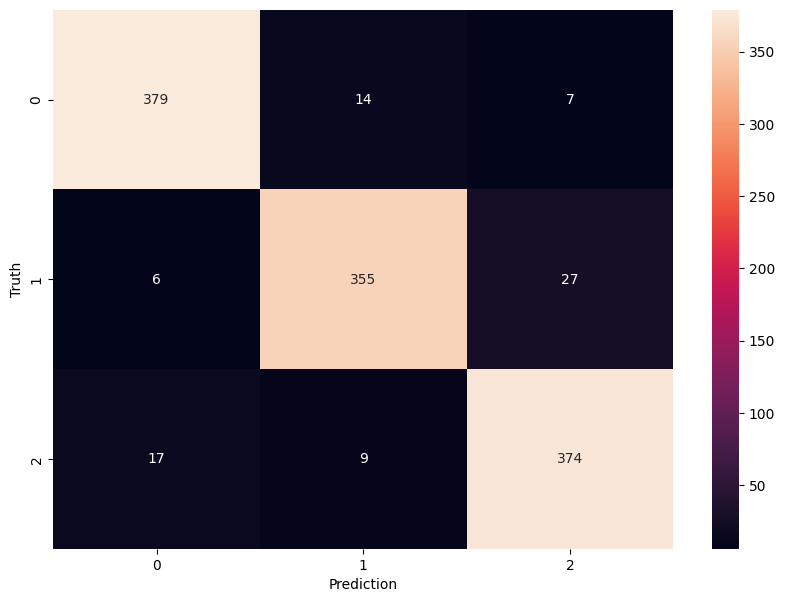

In [227]:
from matplotlib import pyplot as plt
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediction')
plt.ylabel('Truth')